In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError 
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import CategoricalAccuracy
import tensorflow as tf





In [18]:
df = pd.read_csv('AllWeather.csv', index_col='sno')
#df = pd.read_csv('finals.csv', index_col='sno')
##To plot sample data
#print(df.head())
#df.plot(figsize=(10, 5))
#####
#print(df[:25])
df

,station name,station number,Date,Hour,Temp,dew point,humidity,precipitation,snow depth,wind direction,wind speed,peak wind gust,air pressure,one hour sunshine total(minutes),weather condition code,Month,Season
sno,,,,,,,,,,,,,,,,,
1,gulmarg,42026,01-01-2023,0,0.235401,0.120980,0.120000,0.0,0,202,0.030682,0,0.645110,0,3,1,Winter
2,gulmarg,42026,01-01-2023,1,0.237226,0.147014,0.140000,0.0,0,204,0.030682,0,0.644575,0,1,1,Winter
3,gulmarg,42026,01-01-2023,2,0.237226,0.169985,0.160000,0.0,0,205,0.026705,0,0.645644,0,1,1,Winter
4,gulmarg,42026,01-01-2023,3,0.153285,0.392037,0.770000,0.0,0,0,0.000000,0,0.432924,0,1,1,Winter
5,gulmarg,42026,01-01-2023,4,0.240876,0.182236,0.170000,0.0,0,204,0.026705,0,0.649385,0,1,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315356,bhubaneswar,42971,30-11-2023,19,0.565217,0.812808,0.878788,0.0,0,0,0.000000,0,0.234694,0,5,11,Autumn
315357,bhubaneswar,42971,30-11-2023,20,0.542334,0.814039,0.939394,0.0,0,0,0.000000,0,0.234694,0,5,11,Autumn
315358,bhubaneswar,42971,30-11-2023,21,0.556064,0.815271,0.909091,0.0,0,340,0.029412,0,0.223469,0,5,11,Autumn


<Axes: xlabel='sno'>

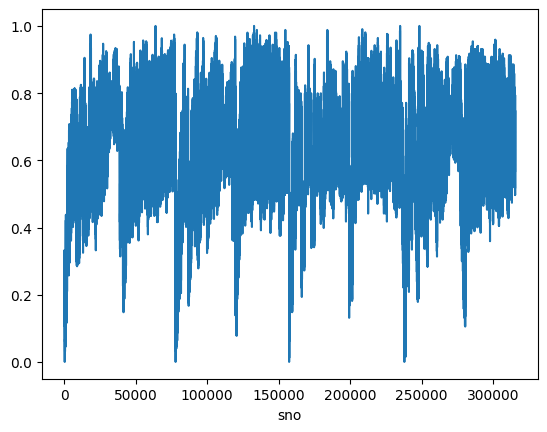

In [19]:
#Plotting Temp Values
temp = df['Temp']
temp.plot()
#plt.show()
#######

#[[[1],[2],[3],[4],[5]]] [6] we give 1 to 5 hours and we get 6th hour value
# [[2,3,4,5,6]] [7] we give 2 to 6 hours and we get 7th hour value
# [[3,4,5,6,7]] [8] we give 3 to 7 hours and we get 8th hour value 
#We predict the next value based on the previous 5 values

#Supervoised learning



In [20]:
def dt_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 12
X, y = dt_to_X_y(temp, window_size=WINDOW_SIZE)
print(X.shape, y.shape)
#print(X[:5])
#print(y[:5])
print(len(X)*.8, len(y)*.1)
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(y)*0.8)]
X_val, y_val = X[int(len(X)*0.8):int(len(X)*0.9)], y[int(len(y)*0.8):int(len(y)*0.9)]
X_test, y_test = X[int(len(X)*0.9):], y[int(len(y)*0.9):]

#Print all shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape) 
print(X_test.shape, y_test.shape)
#All  shape printed




(315348, 12, 1) (315348,)
252278.40000000002 31534.800000000003
(252278, 12, 1) (252278,)
(31535, 12, 1) (31535,)
(31535, 12, 1) (31535,)


In [17]:
model3 = Sequential()
model3.add(InputLayer((12, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

cp = ModelCheckpoint('model22/', save_best_only=True)

model3.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), CategoricalAccuracy()])

history = model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[cp])

score = model3.evaluate(X_test, y_test)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3940/3942 [============================>.] - ETA: 0s - loss: 11.7303 - root_mean_squared_error: 3.4250 - categorical_accuracy: 1.0000

INFO:tensorflow:Assets written to: model22\assets


INFO:tensorflow:Assets written to: model22\assets


3942/3942 [==============================] - 63s 15ms/step - loss: 11.7258 - root_mean_squared_error: 3.4243 - categorical_accuracy: 1.0000 - val_loss: 2.0260 - val_root_mean_squared_error: 1.4234 - val_categorical_accuracy: 1.0000
Epoch 2/10
3942/3942 [==============================] - ETA: 0s - loss: 1.9166 - root_mean_squared_error: 1.3844 - categorical_accuracy: 1.0000

INFO:tensorflow:Assets written to: model22\assets


INFO:tensorflow:Assets written to: model22\assets


3942/3942 [==============================] - 62s 16ms/step - loss: 1.9166 - root_mean_squared_error: 1.3844 - categorical_accuracy: 1.0000 - val_loss: 1.7911 - val_root_mean_squared_error: 1.3383 - val_categorical_accuracy: 1.0000
Epoch 3/10
3936/3942 [============================>.] - ETA: 0s - loss: 1.8289 - root_mean_squared_error: 1.3524 - categorical_accuracy: 1.0000

INFO:tensorflow:Assets written to: model22\assets


INFO:tensorflow:Assets written to: model22\assets


3942/3942 [==============================] - 59s 15ms/step - loss: 1.8286 - root_mean_squared_error: 1.3523 - categorical_accuracy: 1.0000 - val_loss: 1.7816 - val_root_mean_squared_error: 1.3348 - val_categorical_accuracy: 1.0000
Epoch 4/10
3939/3942 [============================>.] - ETA: 0s - loss: 1.7720 - root_mean_squared_error: 1.3312 - categorical_accuracy: 1.0000

INFO:tensorflow:Assets written to: model22\assets


INFO:tensorflow:Assets written to: model22\assets


3942/3942 [==============================] - 59s 15ms/step - loss: 1.7718 - root_mean_squared_error: 1.3311 - categorical_accuracy: 1.0000 - val_loss: 1.7443 - val_root_mean_squared_error: 1.3207 - val_categorical_accuracy: 1.0000
Epoch 5/10
3942/3942 [==============================] - 59s 15ms/step - loss: 1.7330 - root_mean_squared_error: 1.3164 - categorical_accuracy: 1.0000 - val_loss: 1.7625 - val_root_mean_squared_error: 1.3276 - val_categorical_accuracy: 1.0000
Epoch 6/10
3417/3942 [=========================>....] - ETA: 7s - loss: 1.7014 - root_mean_squared_error: 1.3044 - categorical_accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:

###MOdel

model1 = Sequential()
model1.add(InputLayer(input_shape=(WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.summary()

#Model Cleckpoint

cp = ModelCheckpoint('model2/', save_best_only=True)

model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError(), tf.keras.metrics.BinaryAccuracy(), "accuracy"])

history = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[cp])

score = model1.evaluate(X_test, y_test)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3942/3942 [==============================] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0490 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 133s 33ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365 - val_binary_accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
3942/3942 [==============================] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0340 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 166s 42ms/step - loss: 0.0012 - root_mean_squared_error: 0.0340 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353 - val_binary_accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
3942/3942 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0331 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 162s 41ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0338 - val_binary_accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
3941/3942 [============================>.] - ETA: 0s - loss: 9.6032e-04 - root_mean_squared_error: 0.0310 - binary_accuracy: 3.9647e-05 - accuracy: 3.9647e-05

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 142s 36ms/step - loss: 9.6024e-04 - root_mean_squared_error: 0.0310 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05 - val_loss: 8.7877e-04 - val_root_mean_squared_error: 0.0296 - val_binary_accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
3940/3942 [============================>.] - ETA: 0s - loss: 9.0168e-04 - root_mean_squared_error: 0.0300 - binary_accuracy: 3.9657e-05 - accuracy: 3.9657e-05

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


3942/3942 [==============================] - 107s 27ms/step - loss: 9.0156e-04 - root_mean_squared_error: 0.0300 - binary_accuracy: 3.9639e-05 - accuracy: 3.9639e-05 - val_loss: 8.5339e-04 - val_root_mean_squared_error: 0.0292 - val_binary_accuracy: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
3626/3942 [==========================>...] - ETA: 7s - loss: 8.8509e-04 - root_mean_squared_error: 0.0298 - binary_accuracy: 4.3092e-05 - accuracy: 4.3092e-05

In [ ]:
print("Test Score= ", score[0])
print("Test Accuracy= ", score[1])
##Loading the model

model1 = load_model('model2/')

train_prdictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Prediction': train_prdictions, 'Actuals': y_train})
print(train_results)

plt.plot(train_results['Train Prediction'][:10])
plt.plot(train_results['Actuals'][:10]) 
plt.show()